## ✅ 1. Initial Imports & Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## ✅ 2. Load the Data

In [3]:
train_df = pd.read_csv('..\\data\\raw\\train.csv',index_col='PassengerId')
test_df = pd.read_csv('..\\data\\raw\\test.csv')

### Data Overview

In [4]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Handling missing values

In [8]:
print('# nulls in each column')
for column in train_df.columns:
    print(f'# null values in {column} is:',train_df[column].isnull().sum())

# nulls in each column
# null values in Survived is: 0
# null values in Pclass is: 0
# null values in Name is: 0
# null values in Sex is: 0
# null values in Age is: 177
# null values in SibSp is: 0
# null values in Parch is: 0
# null values in Ticket is: 0
# null values in Fare is: 0
# null values in Cabin is: 687
# null values in Embarked is: 2


#### Age column

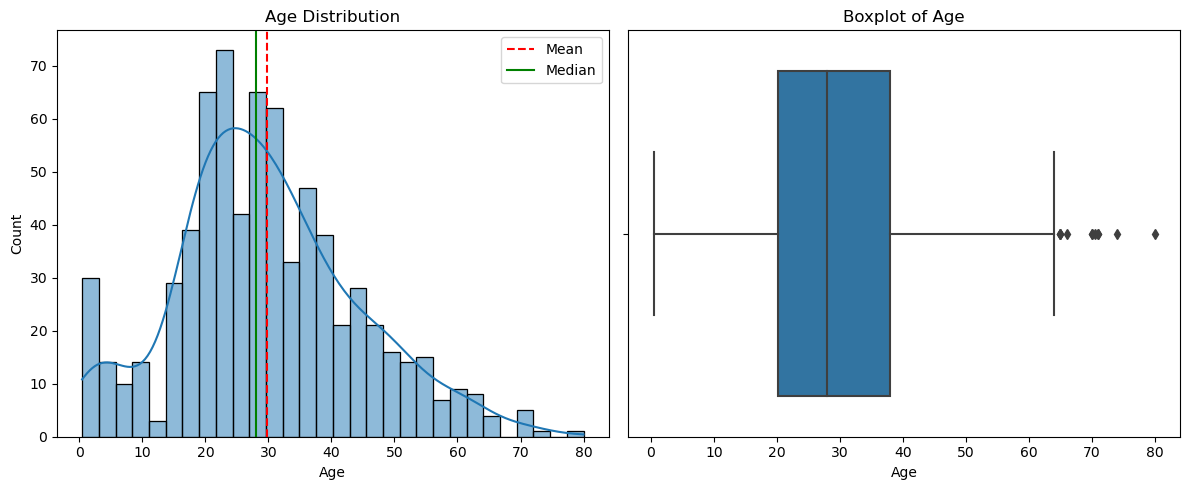

In [9]:
# Check age mean and median and distribution

plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(train_df['Age'], bins=30, kde=True)
plt.axvline(train_df['Age'].mean(), color='r', linestyle='--', label='Mean')
plt.axvline(train_df['Age'].median(), color='g', linestyle='-', label='Median')
plt.title('Age Distribution')
plt.legend()

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=train_df['Age'])
plt.title('Boxplot of Age')

plt.tight_layout()
plt.show()


#### Group by PClass and Sex for AGE distribution, more clarity

In [10]:
grouped_age_stats = train_df.groupby(['Pclass', 'Sex'])['Age'].agg(['count', 'mean', 'median', 'std']).reset_index()
print(grouped_age_stats)

   Pclass     Sex  count       mean  median        std
0       1  female     85  34.611765    35.0  13.612052
1       1    male    101  41.281386    40.0  15.139570
2       2  female     74  28.722973    28.0  12.872702
3       2    male     99  30.740707    30.0  14.793894
4       3  female    102  21.750000    21.5  12.729964
5       3    male    253  26.507589    25.0  12.159514


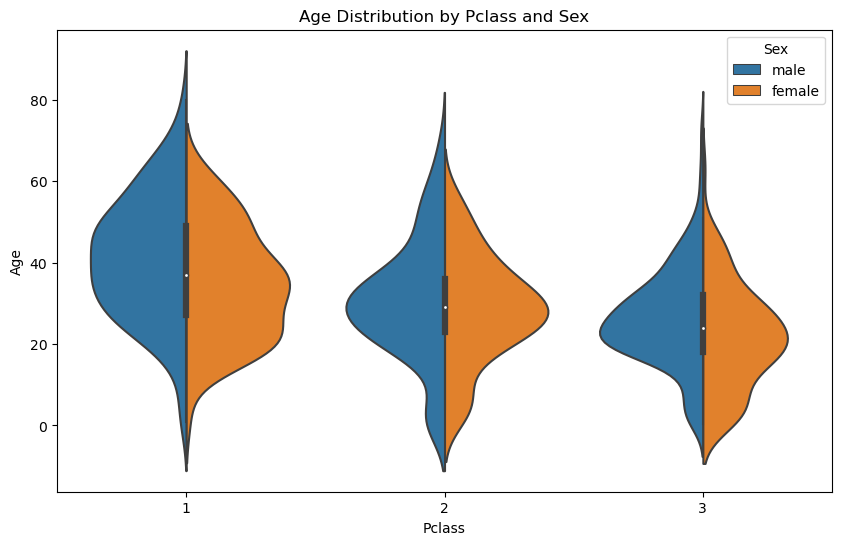

In [11]:
# violin plot

plt.figure(figsize=(10, 6))
sns.violinplot(data=train_df, x='Pclass', y='Age', hue='Sex', split=True)
plt.title('Age Distribution by Pclass and Sex')
plt.show()

<Axes: xlabel='Pclass', ylabel='Age'>

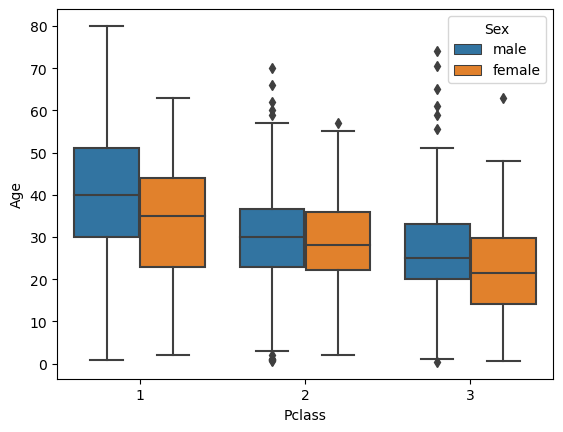

In [12]:
# box plot

sns.boxplot(data=train_df, x='Pclass', y='Age', hue='Sex') 

In [13]:
# fillna of age with median after grouping by PClass and Sex

train_df['Age'] = train_df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

#### Cabin column missing values

In [14]:
set(train_df['Cabin'].values)

{'A10',
 'A14',
 'A16',
 'A19',
 'A20',
 'A23',
 'A24',
 'A26',
 'A31',
 'A32',
 'A34',
 'A36',
 'A5',
 'A6',
 'A7',
 'B101',
 'B102',
 'B18',
 'B19',
 'B20',
 'B22',
 'B28',
 'B3',
 'B30',
 'B35',
 'B37',
 'B38',
 'B39',
 'B4',
 'B41',
 'B42',
 'B49',
 'B5',
 'B50',
 'B51 B53 B55',
 'B57 B59 B63 B66',
 'B58 B60',
 'B69',
 'B71',
 'B73',
 'B77',
 'B78',
 'B79',
 'B80',
 'B82 B84',
 'B86',
 'B94',
 'B96 B98',
 'C101',
 'C103',
 'C104',
 'C106',
 'C110',
 'C111',
 'C118',
 'C123',
 'C124',
 'C125',
 'C126',
 'C128',
 'C148',
 'C2',
 'C22 C26',
 'C23 C25 C27',
 'C30',
 'C32',
 'C45',
 'C46',
 'C47',
 'C49',
 'C50',
 'C52',
 'C54',
 'C62 C64',
 'C65',
 'C68',
 'C7',
 'C70',
 'C78',
 'C82',
 'C83',
 'C85',
 'C86',
 'C87',
 'C90',
 'C91',
 'C92',
 'C93',
 'C95',
 'C99',
 'D',
 'D10 D12',
 'D11',
 'D15',
 'D17',
 'D19',
 'D20',
 'D21',
 'D26',
 'D28',
 'D30',
 'D33',
 'D35',
 'D36',
 'D37',
 'D45',
 'D46',
 'D47',
 'D48',
 'D49',
 'D50',
 'D56',
 'D6',
 'D7',
 'D9',
 'E10',
 'E101',
 'E12',
 

In [15]:
'''🔍 1. Extract Deck Letter:
Most cabin values start with a deck letter (e.g., C85 → 'C'), which indicates the passenger's location on the ship.'''
def extract_cabin(row):
    if pd.isna(row['Cabin']): # If Cabin is missing, return original
        return row['Cabin']
    else: # If Cabin is not missing, return first char
        return row['Cabin'][0]
    
train_df['extract_Cabin'] = train_df.apply(extract_cabin, axis=1)

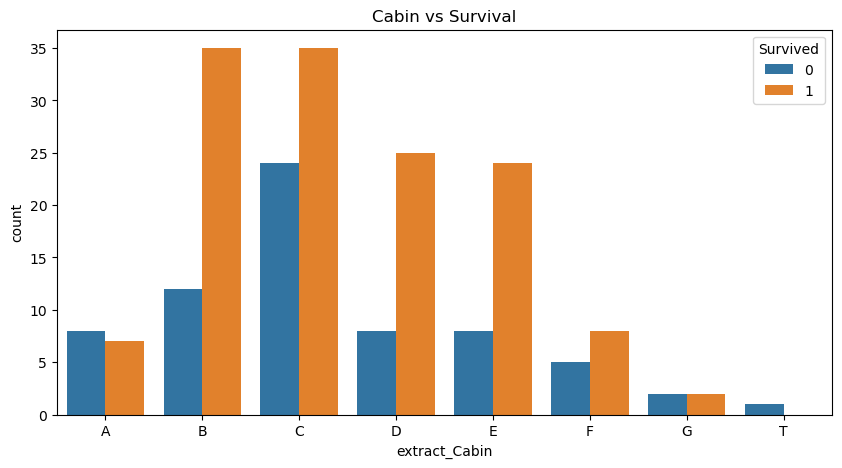

In [16]:
'''📊 2. Check Distribution:
View how deck distribution varies with Survival:'''

plt.figure(figsize=(10, 5))
sns.countplot(data=train_df, x='extract_Cabin', hue='Survived', order=sorted(train_df['extract_Cabin'].dropna().unique()))
plt.title('Cabin vs Survival')
plt.show()

In [17]:
'''🧠 3. Smart Imputation Strategy:
Since ~77% of Cabin values are missing, avoid naive imputation. Instead:

Approach:
Group by (Pclass, Survived) and check most common extract_Cabin.

Use this info to impute missing Cabin_Deck values.'''

# Create mode mapping by class and survival -- returns most common deck for each PClass + Survived agg.
cabin_mode_map = train_df.groupby(['Pclass', 'Survived'])['extract_Cabin'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Define a function to fill based on group mode
def fill_cabin_deck(row):
    if pd.isna(row['extract_Cabin']): # If extract_Cabin is missing, fill with modeMap of group
        return cabin_mode_map.loc[(row['Pclass'], row['Survived'])]
    else: # If extract_Cabin is not missing, return original value
        return row['extract_Cabin']

train_df['Cabin_Deck'] = train_df.apply(fill_cabin_deck, axis=1)

<Axes: xlabel='Cabin_Deck', ylabel='Fare'>

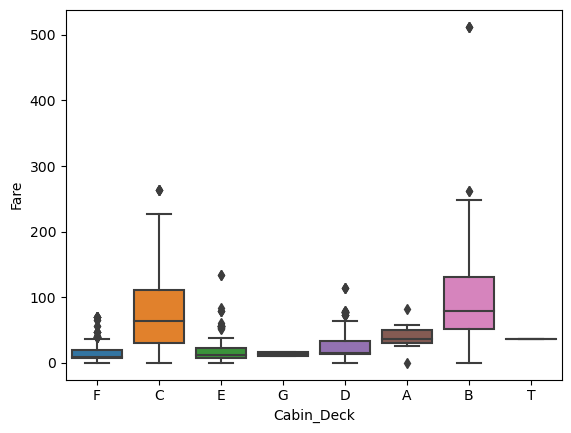

In [18]:
sns.boxplot(data=train_df, x='Cabin_Deck', y='Fare')

#### Embarked column

In [19]:
'''Smart Imputation: Group by and fillna values
Pros:

Retains all data.

Smarter fill using passenger class, gender, and survival (which reflect travel and ticket info).

Cons:

Slightly more complex.

Might overfit if training data is small and not diverse in combinations.'''

embarked_mode_map = train_df.groupby(['Pclass', 'Sex', 'Survived'])['Embarked'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

def fill_embarked(row):
    if pd.isna(row['Embarked']):
        return embarked_mode_map.loc[(row['Pclass'], row['Sex'], row['Survived'])]
    return row['Embarked']

train_df['Embarked'] = train_df.apply(fill_embarked, axis=1)


### Correlation check

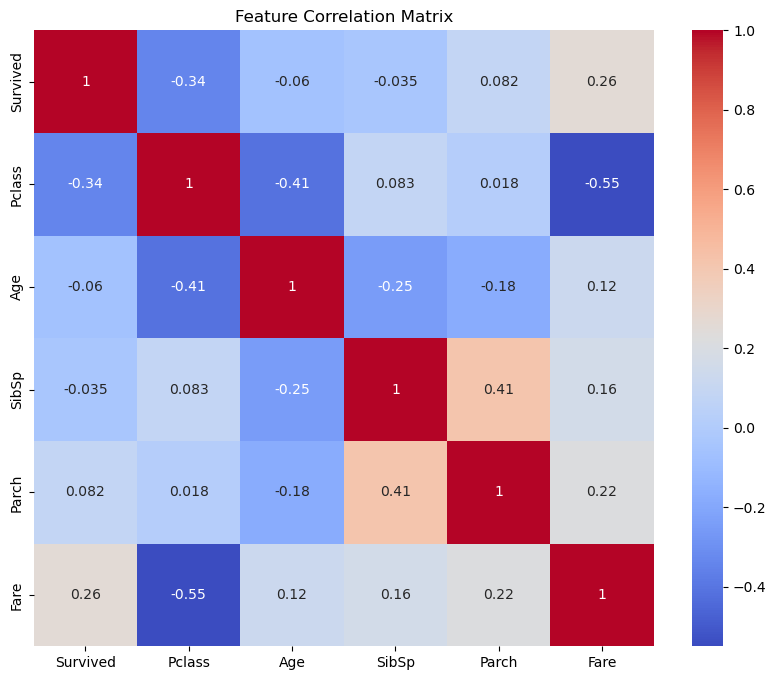

In [20]:
# correlation heat map

corr = train_df.select_dtypes(include=['int64', 'float64']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


#### Observations from Corr Matrix

## 🔍 Correlation Insights and Feature Engineering

### 📊 1. `Survived` & `Pclass` = **-0.34**

**Insight**:
- Higher-class passengers had higher chances of survival.
- As `Pclass` increases (from 1 to 3), survival rate tends to decrease.

**Modeling Tip**:
- Retain `Pclass` as a key feature.
- Consider encoding: Ordinal or One-Hot depending on the model type.

---

### 📊 2. `Pclass` & `Age` = **-0.41**

**Insight**:
- Older passengers were more likely in 1st class.
- Possibly due to affordability or family travel patterns.

**Modeling Tip**:
- Keep both `Pclass` and `Age`.
- Watch out for multicollinearity in linear models — check VIF.

---

### 📊 3. `Fare` & `Pclass` = **-0.55**

**Insight**:
- Higher-class tickets are costlier (expected).
- `Fare` and `Pclass` may carry overlapping information.

**Modeling Tip**:
- Keep both for now, but monitor multicollinearity.
- Consider engineering a feature like:
  
  ```python
  FarePerPerson = Fare / FamilySize

### 📊 4. `SibSp` & `Parch` = **0.41**
**Insight:**
- Passengers with siblings/spouses aboard often had parents/children with them too.
- Suggests family travel.

**Modeling Tip:**
- Instead of keeping SibSp and Parch separately, you can create a new feature:
`train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1  # +1 for self`
- This helps summarize family structure in one variable and might perform better in models.

## ✅ Summary of Derived Features/Actions

| Feature Relationship | Observation  |	Suggested Action |
|---------|-------------|----------------|
| Pclass vs Survived |	Lower class, lower survival |	Keep Pclass |
| Age vs Pclass |	Older passengers in higher classes |	Keep both; monitor VIF |
| Fare vs Pclass |	Redundant info; strong negative corr |	Keep both; monitor multicollinearity |
| SibSp vs Parch |	Family travels together	| Create FamilySize |

#### VIF
__What to do about it?__
- Ignore the VIF of const.
- Focus instead on the VIF scores of actual features.
- If any of them have VIF > 10, it might indicate strong multicollinearity.
- If VIF > 5, keep an eye; consider dimensionality reduction or feature elimination depending on the case.

__Why it's needed?__
- For Logistic regression we need to identify if correlation among features exist as Linear regression
- assumes independence among features.

| Column   | VIF Value | Action                      |
| -------- | --------- | --------------------------- |
| `const`  | \~30–100+ | ✅ Ignore                    |
| Features | > 10      | ⚠️ Investigate collinearity |
| Features | < 5       | ✅ Generally safe            |

In [21]:
# VIF multi-collinearity check

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Select numeric features only
X = train_df[['Pclass', 'Age', 'Fare', 'SibSp', 'Parch']]
X = add_constant(X)

pd.DataFrame({
    'Feature': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})


,Feature,VIF
0,const,32.049754
1,Pclass,1.760360
2,Age,1.296438
3,Fare,1.590332
4,SibSp,1.281874
5,Parch,1.262833


##### VIF Observation
**NO MULTI-COLLINEARITY**

#### Create Family Size feature from SibSp and Parch

In [22]:
# Create Family Size

train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

### Drop Name, Cabin and Ticket

In [23]:
# Dropping columns as Cabin is Feature Engineered and Ticket has no useful information

train_df.drop(['Name','Cabin', 'Ticket','extract_Cabin'], axis=1, inplace=True)

### Encoding Categorical Features

In [24]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=['Embarked', 'Cabin_Deck'], use_cat_names=True)
train_encoded = encoder.fit_transform(train_df)

# Encode 'Sex' as binary
train_encoded['Sex'] = train_encoded['Sex'].map({'male': 1, 'female': -1})


In [25]:
train_encoded.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q,Cabin_Deck_F,Cabin_Deck_C,Cabin_Deck_E,Cabin_Deck_G,Cabin_Deck_D,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_T,FamilySize
PassengerId,,,,,,,,,,,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,1,0,0,1,0,0,0,0,0,0,0,2
2,1,1,-1,38.0,1,0,71.2833,0,1,0,0,1,0,0,0,0,0,0,2
3,1,3,-1,26.0,0,0,7.9250,1,0,0,0,0,1,0,0,0,0,0,1
4,1,1,-1,35.0,1,0,53.1000,1,0,0,0,1,0,0,0,0,0,0,2
5,0,3,1,35.0,0,0,8.0500,1,0,0,1,0,0,0,0,0,0,0,1


In [26]:
train_encoded.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_S', 'Embarked_C', 'Embarked_Q', 'Cabin_Deck_F',
       'Cabin_Deck_C', 'Cabin_Deck_E', 'Cabin_Deck_G', 'Cabin_Deck_D',
       'Cabin_Deck_A', 'Cabin_Deck_B', 'Cabin_Deck_T', 'FamilySize'],
      dtype='object')

#### ✅ Step-by-Step Transformation Plan for Test Data

In [27]:
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

In [28]:
test_df['Cabin_Deck'] = test_df['Cabin'].astype(str).str[0]
def fill_cabin_deck_test(row):
    if pd.isna(row['Cabin_Deck']) or row['Cabin_Deck'] == 'n':
        return cabin_mode_map.loc[(row['Pclass'], 1)]  # Assume Survived=1 (or adjust as per use-case)
    else:
        return row['Cabin_Deck']

test_df['Cabin_Deck'] = test_df.apply(fill_cabin_deck_test, axis=1)
test_df['Sex'] = test_df['Sex'].map({'male': 1, 'female': -1})
test_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(train_df['Fare'].median(), inplace=True)
test_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
test_df = pd.get_dummies(test_df, columns=['Embarked', 'Cabin_Deck'])

# Ensure all columns match train set
for col in ['Embarked_S', 'Embarked_C', 'Embarked_Q',
            'Cabin_Deck_F', 'Cabin_Deck_C', 'Cabin_Deck_E', 'Cabin_Deck_G',
            'Cabin_Deck_D', 'Cabin_Deck_A', 'Cabin_Deck_B', 'Cabin_Deck_T']:
    if col not in test_df.columns:
        test_df[col] = 0

# drop columns
test_df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True, errors='ignore')

test_df.head()


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T
0,892,3,1,34.5,0,0,7.8292,1,0,1,0,0,0,0,0,1,0,0,0
1,893,3,-1,47.0,1,0,7.0000,2,0,0,1,0,0,0,0,1,0,0,0
2,894,2,1,62.0,0,0,9.6875,1,0,1,0,0,0,0,0,0,1,0,0
3,895,3,1,27.0,0,0,8.6625,1,0,0,1,0,0,0,0,1,0,0,0
4,896,3,-1,22.0,1,1,12.2875,3,0,0,1,0,0,0,0,1,0,0,0


In [29]:
train_encoded.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q,Cabin_Deck_F,Cabin_Deck_C,Cabin_Deck_E,Cabin_Deck_G,Cabin_Deck_D,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_T,FamilySize
PassengerId,,,,,,,,,,,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,1,0,0,1,0,0,0,0,0,0,0,2
2,1,1,-1,38.0,1,0,71.2833,0,1,0,0,1,0,0,0,0,0,0,2
3,1,3,-1,26.0,0,0,7.9250,1,0,0,0,0,1,0,0,0,0,0,1
4,1,1,-1,35.0,1,0,53.1000,1,0,0,0,1,0,0,0,0,0,0,2
5,0,3,1,35.0,0,0,8.0500,1,0,0,1,0,0,0,0,0,0,0,1


### Export encodedTrain and Transformed Test Data into seperate csv's

In [30]:
import os
os.makedirs("../data/processed", exist_ok=True)

In [31]:
# Save processed training data
train_encoded.to_csv("../data/processed/train_encoded.csv", index=False)
test_df.to_csv("../data/processed/test_encoded.csv", index='PassengerId')